In [8]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [9]:
%matplotlib widget

In [10]:
l = 25
npts = 500
midpt = np.round(npts/2).astype(int); print(midpt)
x = np.linspace(-l,l,npts)
N_l = 11
k = N_l/l**2
n = 2
eps = -1

250


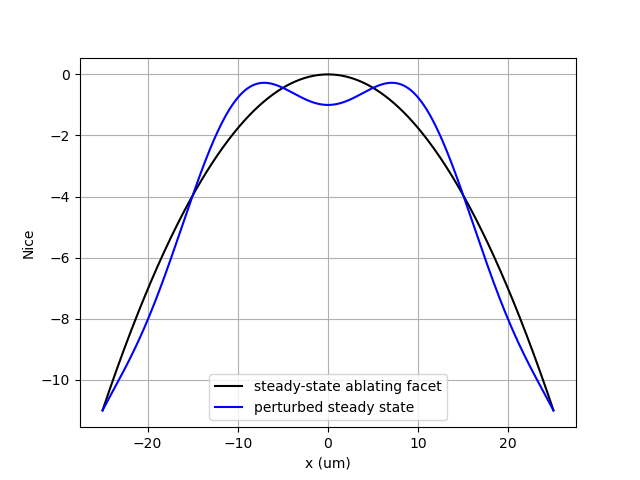

In [15]:
f_ss = -k*x**2
f_perturbation = eps*np.cos((n+.5)*np.pi*x/l)
f_perturbed = f_ss + f_perturbation
plt.figure()
plt.plot(x,f_ss,'k',label='steady-state ablating facet')
# plt.plot(x,f_perturbation,'r',label='perturbation')
plt.plot(x,f_perturbed,'b',label='perturbed steady state')
plt.grid(True)
plt.xlabel('x (um)')
plt.ylabel('Nice')
plt.legend()

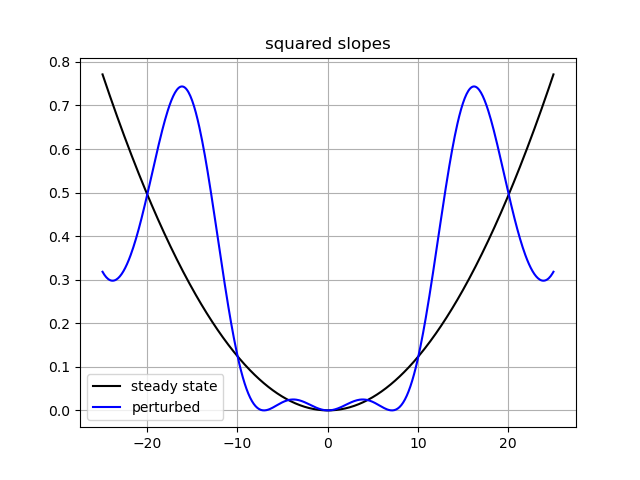

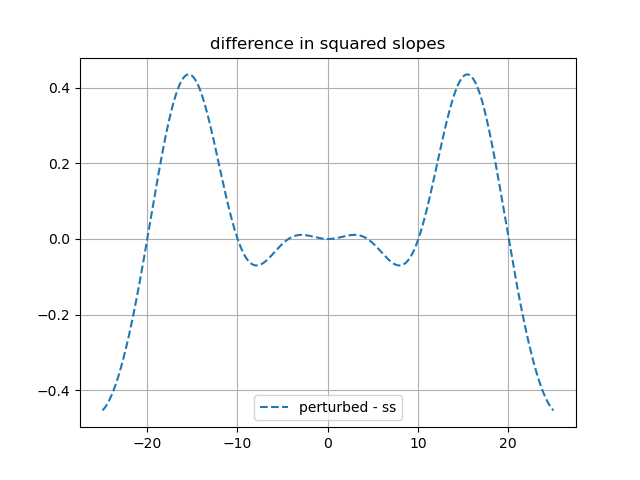

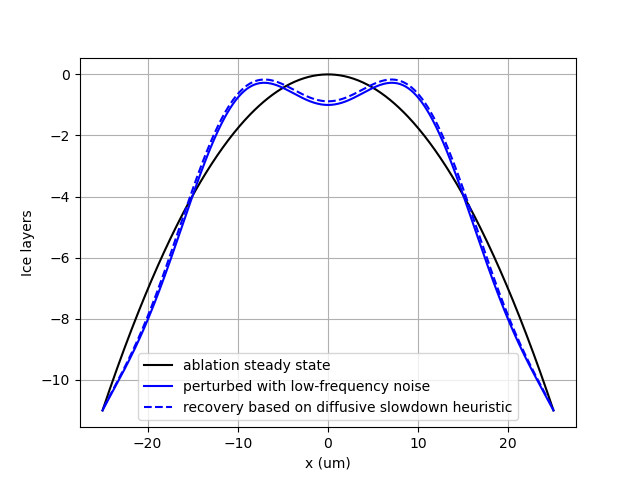

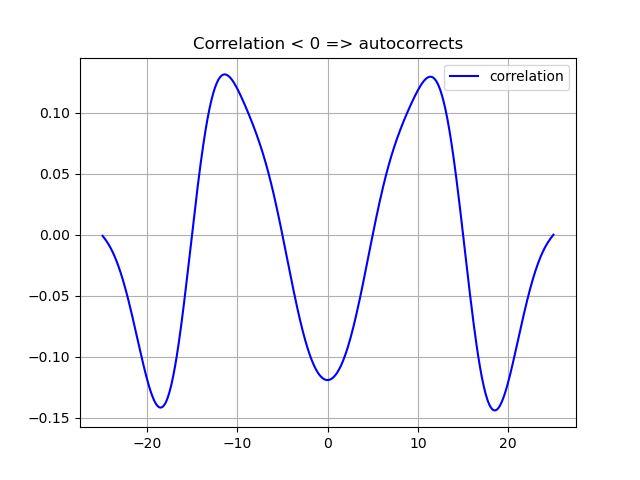

In [17]:
xp = x[1:]

slope_ss_squared = (np.diff(f_ss)/np.diff(x))**2
slope_perturbed_squared = (np.diff(f_perturbed)/np.diff(x))**2
plt.figure()
plt.plot(xp,slope_ss_squared,'k',label='steady state')
plt.plot(xp,slope_perturbed_squared,'b',label='perturbed')
plt.grid(True)
plt.legend()
plt.title('squared slopes')

f2_deviation = slope_perturbed_squared - slope_ss_squared
plt.figure()
plt.plot(xp,f2_deviation,'--',label='perturbed - ss')
plt.grid(True)
plt.legend()
plt.title('difference in squared slopes')

growth_factor = .2
correction = growth_factor*f2_deviation 
f_perturbed_later = f_perturbed[1:] + correction
shift = np.mean(f_ss[1:]-f_perturbed_later)
f_perturbed_later += shift
plt.figure()
plt.plot(x,f_ss,'k',label='ablation steady state')
plt.plot(x,f_perturbed,'b',label='perturbed with low-frequency noise')
plt.plot(xp,f_perturbed_later,'b--',label='recovery based on diffusive slowdown heuristic')
plt.grid(True)
plt.xlabel('x (um)')
plt.ylabel('Ice layers')
plt.legend()

plt.figure()
real_correction = f_perturbed_later - f_perturbed[1:]
plt.plot(xp,f_perturbation[1:]*real_correction,'b',label='correlation')
plt.grid(True)
plt.title('Correlation < 0 => autocorrects')
plt.legend()